<a href="https://colab.research.google.com/github/nsarache0/Decision-Making-Projects/blob/main/Decision%20Making%20-%20Entropy%20Weight%20Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Decision Making - Entropy Weight Method**
Hello, in this notebook you will find how to perform the entropy weight method in python to generate data for a new variable. In this case, the new variable will be named "Effort".

The independent variables that we will be weighting are measured via a software program developed by Proyectiza S.A.S, one of the biggest Project Managment Consulting firms in Colombia and Latin America.

The entropy weight method is only applyable to numerical type data, so be sure of fitting this requirement before deciding to apply this method to your specific problem.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


We have to upload the dataset in Google dirve and connect it to Google Colab in order to manipulate it. In this case, the data is stored in a Excel sheet.

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/mipmo/datamipmo_py.xlsx")
df

,pres_id,pres_codigo,cantidad_tiempo (seg),cantidad_accesos,Frecuencia Trabajo,cantidad_personas,cantidad_comentarios,cantidad_likes,cantidad_dislikes,Tiempo total (seg),FAQ tiempo (Seg),Cantidad accesos FAQ
0,124,CA-10,5830,13,0.002230,4,5,8,1,48 days 22:23:00,281,10
1,102,CA-01,1834,6,0.003272,4,3,12,0,34 days 06:42:00,120,7
2,183,CA-147,4928,11,0.002232,5,2,3,1,27 days 03:08:00,281,7
3,112,CA-63,3644,8,0.002195,3,5,4,0,49 days 10:16:00,120,7
4,107,CA-06,886,4,0.004515,2,3,5,1,32 days 03:25:00,110,4
5,125,CA-20,1487,8,0.005380,4,2,3,1,0 days 00:16:00,539,7
6,115,CA-66,1182,3,0.002538,1,1,2,2,34 days 06:23:00,110,10
7,128,CA-25,887,6,0.006764,3,1,2,1,46 days 01:04:00,169,6
8,186,CA-150,861,6,0.006969,2,1,3,1,26 days 11:03:00,50,10
9,129,CA-27,595,6,0.010084,3,1,0,1,34 days 06:23:00,50,5


## Data cleaning and processing

For this particular dataset, have a variable that is time-type data, so we transform it in units of seconds in order to make it a numerical type variable.

In [ ]:
df["Tiempo total (seg)"] = df["Tiempo total (seg)"]/pd.Timedelta(seconds = 1)

We then verify that all of the variables in the dataset are numerical type.

In [ ]:
df.dtypes

pres_id                    int64
pres_codigo               object
cantidad_tiempo (seg)      int64
cantidad_accesos           int64
Frecuencia Trabajo       float64
cantidad_personas          int64
cantidad_comentarios       int64
cantidad_likes             int64
cantidad_dislikes          int64
Tiempo total (seg)       float64
FAQ tiempo (Seg)           int64
Cantidad accesos FAQ       int64
dtype: object

We remove the id variables that label each observation differently "pres_id" and "pres_codigo" in this case. Then we have our dataframe with only the variables that will be weight.  

In [ ]:
df_raw = df.drop(["pres_id", "pres_codigo"], axis = 1)
df_raw

,cantidad_tiempo (seg),cantidad_accesos,Frecuencia Trabajo,cantidad_personas,cantidad_comentarios,cantidad_likes,cantidad_dislikes,Tiempo total (seg),FAQ tiempo (Seg),Cantidad accesos FAQ
0,5830,13,0.002230,4,5,8,1,4227780.0,281,10
1,1834,6,0.003272,4,3,12,0,2961720.0,120,7
2,4928,11,0.002232,5,2,3,1,2344080.0,281,7
3,3644,8,0.002195,3,5,4,0,4270560.0,120,7
4,886,4,0.004515,2,3,5,1,2777100.0,110,4
5,1487,8,0.005380,4,2,3,1,960.0,539,7
6,1182,3,0.002538,1,1,2,2,2960580.0,110,10
7,887,6,0.006764,3,1,2,1,3978240.0,169,6
8,861,6,0.006969,2,1,3,1,2286180.0,50,10
9,595,6,0.010084,3,1,0,1,2960580.0,50,5


Finally we have to replace any observation with a value of $0$ (zero) with $1*e-20$, due to the fact that susbequently we have to apply the natural logarithm to the entire dataset, and this cannot happen mathematically speaking if we have $ln(0)$, getting a traceback in return.

In [ ]:
df_final = df_raw.replace(0, 1e-20)
df_final

,cantidad_tiempo (seg),cantidad_accesos,Frecuencia Trabajo,cantidad_personas,cantidad_comentarios,cantidad_likes,cantidad_dislikes,Tiempo total (seg),FAQ tiempo (Seg),Cantidad accesos FAQ
0,5830,13,0.002230,4,5.000000e+00,8.000000e+00,1.000000e+00,4.227780e+06,281,10
1,1834,6,0.003272,4,3.000000e+00,1.200000e+01,1.000000e-20,2.961720e+06,120,7
2,4928,11,0.002232,5,2.000000e+00,3.000000e+00,1.000000e+00,2.344080e+06,281,7
3,3644,8,0.002195,3,5.000000e+00,4.000000e+00,1.000000e-20,4.270560e+06,120,7
4,886,4,0.004515,2,3.000000e+00,5.000000e+00,1.000000e+00,2.777100e+06,110,4
5,1487,8,0.005380,4,2.000000e+00,3.000000e+00,1.000000e+00,9.600000e+02,539,7
6,1182,3,0.002538,1,1.000000e+00,2.000000e+00,2.000000e+00,2.960580e+06,110,10
7,887,6,0.006764,3,1.000000e+00,2.000000e+00,1.000000e+00,3.978240e+06,169,6
8,861,6,0.006969,2,1.000000e+00,3.000000e+00,1.000000e+00,2.286180e+06,50,10
9,595,6,0.010084,3,1.000000e+00,1.000000e-20,1.000000e+00,2.960580e+06,50,5


## Weight calculation

**1. First, we compute the sum of every variable**

In [ ]:
total = df_final.sum()
total

cantidad_tiempo (seg)    2.538100e+04
cantidad_accesos         1.410000e+02
Frecuencia Trabajo       5.053414e+00
cantidad_personas        8.700000e+01
cantidad_comentarios     5.000000e+01
cantidad_likes           9.700000e+01
cantidad_dislikes        3.300000e+01
Tiempo total (seg)       5.019786e+07
FAQ tiempo (Seg)         7.621000e+03
Cantidad accesos FAQ     3.040000e+02
dtype: float64

**2. Normalization**

We normalize all the variables because we have different units (time and quantity variables), son normalizing them helps to depend only in the entropy for the weighting process. Normalization in this case is performed dividing every observation by the total sum of it's variable.

A normalized observation is defined as:

<center>$p_{ij} = \frac{x_{ij}}{\sum_{j=1}^{n} x_{ij}}$</center>



Where:

- $p_{ij}$ : Normalized value for the i-th variable in the j-th observation.
- $x_{ij}$ : Original value for the i-th variable in the j-th observation.
- $n$ : Sample Size (quantity of rows)




In [ ]:
df_norm = df_final.div(total, axis=1)
df_norm

,cantidad_tiempo (seg),cantidad_accesos,Frecuencia Trabajo,cantidad_personas,cantidad_comentarios,cantidad_likes,cantidad_dislikes,Tiempo total (seg),FAQ tiempo (Seg),Cantidad accesos FAQ
0,0.229699,0.092199,0.000441,0.045977,1.000000e-01,8.247423e-02,3.030303e-02,8.422232e-02,0.036872,0.032895
1,0.072259,0.042553,0.000647,0.045977,6.000000e-02,1.237113e-01,3.030303e-22,5.900092e-02,0.015746,0.023026
2,0.194161,0.078014,0.000442,0.057471,4.000000e-02,3.092784e-02,3.030303e-02,4.669681e-02,0.036872,0.023026
3,0.143572,0.056738,0.000434,0.034483,1.000000e-01,4.123711e-02,3.030303e-22,8.507454e-02,0.015746,0.023026
4,0.034908,0.028369,0.000893,0.022989,6.000000e-02,5.154639e-02,3.030303e-02,5.532308e-02,0.014434,0.013158
5,0.058587,0.056738,0.001065,0.045977,4.000000e-02,3.092784e-02,3.030303e-02,1.912432e-05,0.070726,0.023026
6,0.046570,0.021277,0.000502,0.011494,2.000000e-02,2.061856e-02,6.060606e-02,5.897821e-02,0.014434,0.032895
7,0.034947,0.042553,0.001339,0.034483,2.000000e-02,2.061856e-02,3.030303e-02,7.925119e-02,0.022176,0.019737
8,0.033923,0.042553,0.001379,0.022989,2.000000e-02,3.092784e-02,3.030303e-02,4.554338e-02,0.006561,0.032895
9,0.023443,0.042553,0.001995,0.034483,2.000000e-02,1.030928e-22,3.030303e-02,5.897821e-02,0.006561,0.016447


**3. Entropy**

For computing the entropy $E_i$, we use the next equation:

<center>$E_i = -\frac{{\sum_{j=1}^{n} p_{ij} \cdot \ln(p_{ij})}}{{\ln(n)}}$</center>



We first calculate the numerator of the formula defining a function for it:

In [ ]:
def multiply_by_ln(val) :
  return val*np.log(val)

df_ln = df_norm.map(multiply_by_ln)
df_ln

,cantidad_tiempo (seg),cantidad_accesos,Frecuencia Trabajo,cantidad_personas,cantidad_comentarios,cantidad_likes,cantidad_dislikes,Tiempo total (seg),FAQ tiempo (Seg),Cantidad accesos FAQ
0,-0.337884,-0.219784,-0.003409,-0.141591,-2.302585e-01,-2.057954e-01,-1.059548e-01,-2.083909e-01,-0.121688,-0.112317
1,-0.189860,-0.134340,-0.004754,-0.141591,-1.688046e-01,-2.585325e-01,-1.501461e-20,-1.669845e-01,-0.065364,-0.086835
2,-0.318243,-0.199004,-0.003412,-0.164165,-1.287550e-01,-1.075082e-01,-1.059548e-01,-1.430827e-01,-0.121688,-0.086835
3,-0.278662,-0.162798,-0.003363,-0.116114,-2.302585e-01,-1.314811e-01,-1.501461e-20,-2.096430e-01,-0.065364,-0.086835
4,-0.117118,-0.101063,-0.006272,-0.086730,-1.688046e-01,-1.528491e-01,-1.059548e-01,-1.601362e-01,-0.061173,-0.056983
5,-0.166226,-0.162798,-0.007287,-0.141591,-1.287550e-01,-1.075082e-01,-1.059548e-01,-2.077771e-04,-0.187348,-0.086835
6,-0.142821,-0.081918,-0.003815,-0.051332,-7.824046e-02,-8.003224e-02,-1.699006e-01,-1.669430e-01,-0.061173,-0.112317
7,-0.117210,-0.134340,-0.008856,-0.116114,-7.824046e-02,-8.003224e-02,-1.059548e-01,-2.009123e-01,-0.084462,-0.077472
8,-0.114784,-0.134340,-0.009083,-0.086730,-7.824046e-02,-1.075082e-01,-1.059548e-01,-1.406876e-01,-0.032979,-0.112317
9,-0.087985,-0.134340,-0.012406,-0.116114,-7.824046e-02,-5.219218e-21,-1.059548e-01,-1.669430e-01,-0.032979,-0.067559


Then we compute the total sums of the new dataframe.

In [ ]:
total_ln = df_ln.sum().tolist()
total_ln

[-2.5142019581343904,
 -3.537922457491295,
 -2.946326118685135,
 -3.6978402687726613,
 -3.0387446385617105,
 -3.1581767259989633,
 -3.1604362011949916,
 -2.8351880286881928,
 -3.654306315154575,
 -3.805009756071022]

We take the sample size from the dataset:

In [ ]:
#sacamos tamaño de muestra
n = len(df)
n

47

Finally we calculate the entropy values for every variable using the totals computed above.

In [ ]:
entropy = []

for i in total_ln:
  ent = -(1/np.log(n))*i
  entropy.append(ent)

entropy

[0.653014434308362,
 0.9189056689462797,
 0.7652501731041461,
 0.9604411703931172,
 0.7892540631980032,
 0.820274195357146,
 0.8208610495325612,
 0.7363842434063912,
 0.949134083465138,
 0.9882763337127678]

**4. Diversification degree**

The diversification degree (Dg) is calculated using the next formula:

<center>$Dg = 1-E_i$</center>



In [ ]:
div_gr = []
for i in entropy:
  div = 1-i
  div_gr.append(div)

div_gr


[0.34698556569163796,
 0.08109433105372033,
 0.23474982689585389,
 0.03955882960688284,
 0.21074593680199682,
 0.17972580464285404,
 0.17913895046743877,
 0.2636157565936088,
 0.050865916534862055,
 0.011723666287232204]

**5. Weights**

Finally, for calculating the weights, we use the subsequently formula:

<center>$w_i = \frac{1 - E_i}{\sum_{j=1}^{m}(1 - E_j)}$</center>

The numerator in this case is the Diversification degree $Dg$ computed above.

We also need to calculate the totals of the $Dg$ to complete the calculation:



In [ ]:
total_div_gr = sum(div_gr)
total_div_gr

1.5982045845760877

Finally we calculate the weights as:

In [ ]:
weight = []
for i in div_gr:
  w = i/total_div_gr
  weight.append(w)

weight

[0.21710960476544583,
 0.05074089502454407,
 0.14688346483383388,
 0.024752043629868284,
 0.13186417986524276,
 0.1124548173477584,
 0.1120876214448816,
 0.16494493829995552,
 0.031826911914630676,
 0.007335522873838972]

In [ ]:
weight_porc = [x * 100 for x in weight]
weight_porc

[21.71096047654458,
 5.074089502454407,
 14.688346483383388,
 2.4752043629868283,
 13.186417986524276,
 11.24548173477584,
 11.20876214448816,
 16.49449382999555,
 3.182691191463068,
 0.7335522873838972]

This returns a list of the computed weights.

**6. Calculating the Effort variable**

Once we have the weights, we have to multiply every observation against the weight of the corresponding variable. This is:


<center>$Effort = x_1 \cdot w_1 + w_2 \cdot x_2 + \ldots + x_{10} \cdot w_{10}$</center>

Where:

- x<sub>1</sub>, ... , x<sub>10</sub>
 : Independent variables.
- w<sub>1</sub>, ... , w<sub>10</sub> : Computed weights.




In [ ]:
df_aux = df_norm.multiply(weight)
effort = df_aux.sum(axis=1)
effort

0     0.096916
1     0.051306
2     0.068794
3     0.067493
4     0.036505
5     0.031465
6     0.033727
7     0.033072
8     0.027770
9     0.024487
10    0.019475
11    0.025011
12    0.015347
13    0.026934
14    0.028372
15    0.011486
16    0.013025
17    0.010766
18    0.007288
19    0.012222
20    0.015158
21    0.004939
22    0.021152
23    0.003779
24    0.020658
25    0.006987
26    0.026224
27    0.003471
28    0.012075
29    0.005384
30    0.003999
31    0.027103
32    0.014661
33    0.026710
34    0.012067
35    0.015797
36    0.007369
37    0.006010
38    0.006210
39    0.016641
40    0.006854
41    0.020298
42    0.008519
43    0.008543
44    0.030834
45    0.011233
46    0.015865
dtype: float64

**7. Scaling the Effort variable:**

Since the Effort variable is dimensionless, due to the linear combination of normalized variables, it must be scaled from 0 to 100 to have a useful interpetability.

The Effort units in this case are understood as "Effort Points".

In [ ]:
effort_list = effort.tolist()

min_val = min(effort_list)
max_val = max(effort_list)

scaled_effort = [100 * (x - min_val) / (max_val - min_val) if max_val != min_val else 0 for x in effort_list]
scaled_effort

[100.0,
 51.19079802708132,
 69.90568602025915,
 68.51382885288331,
 35.351068953857435,
 29.958041737061848,
 32.37805211656896,
 31.677333738520556,
 26.00333276878027,
 22.490075696336465,
 17.126221650816067,
 23.050835801257904,
 12.70915418235971,
 25.108504425412338,
 26.647242816772497,
 8.576573744837818,
 10.223491290797678,
 7.806334644910325,
 4.084963769563047,
 9.364340816637869,
 12.50684131888247,
 1.5708850214164787,
 18.92072323474311,
 0.32973663928780184,
 18.392402493530895,
 3.7627807978759225,
 24.34862566880473,
 0.0,
 9.207026782096081,
 2.047394769680098,
 0.5650913360433961,
 25.289448550180467,
 11.97475411131869,
 24.86931042056974,
 9.199164166923149,
 13.190426721644302,
 4.171659679524669,
 2.716475218284248,
 2.930996903431447,
 14.093180812040815,
 3.620021614765121,
 18.007698659135787,
 5.401511722958373,
 5.427334617046016,
 29.28227107079285,
 8.306754725890965,
 13.262839062075141]

**8. Attaching the effort variable to the original dataset**

In [ ]:
df_raw["Esfuerzo"] = scaled_effort
df_raw

,cantidad_tiempo (seg),cantidad_accesos,Frecuencia Trabajo,cantidad_personas,cantidad_comentarios,cantidad_likes,cantidad_dislikes,Tiempo total (seg),FAQ tiempo (Seg),Cantidad accesos FAQ,Esfuerzo
0,5830,13,0.002230,4,5,8,1,4227780.0,281,10,100.000000
1,1834,6,0.003272,4,3,12,0,2961720.0,120,7,51.190798
2,4928,11,0.002232,5,2,3,1,2344080.0,281,7,69.905686
3,3644,8,0.002195,3,5,4,0,4270560.0,120,7,68.513829
4,886,4,0.004515,2,3,5,1,2777100.0,110,4,35.351069
5,1487,8,0.005380,4,2,3,1,960.0,539,7,29.958042
6,1182,3,0.002538,1,1,2,2,2960580.0,110,10,32.378052
7,887,6,0.006764,3,1,2,1,3978240.0,169,6,31.677334
8,861,6,0.006969,2,1,3,1,2286180.0,50,10,26.003333
9,595,6,0.010084,3,1,0,1,2960580.0,50,5,22.490076


In [ ]:
df["Esfuerzo"] = scaled_effort


**9. Exporting the dataframe to an excel file for Data Analysis:**

In [ ]:
df.to_excel("esfuerzomipmo.xlsx", index = False, engine = "openpyxl")

**10. Correlation Matrix of the independent variables vs Effort variable**:


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

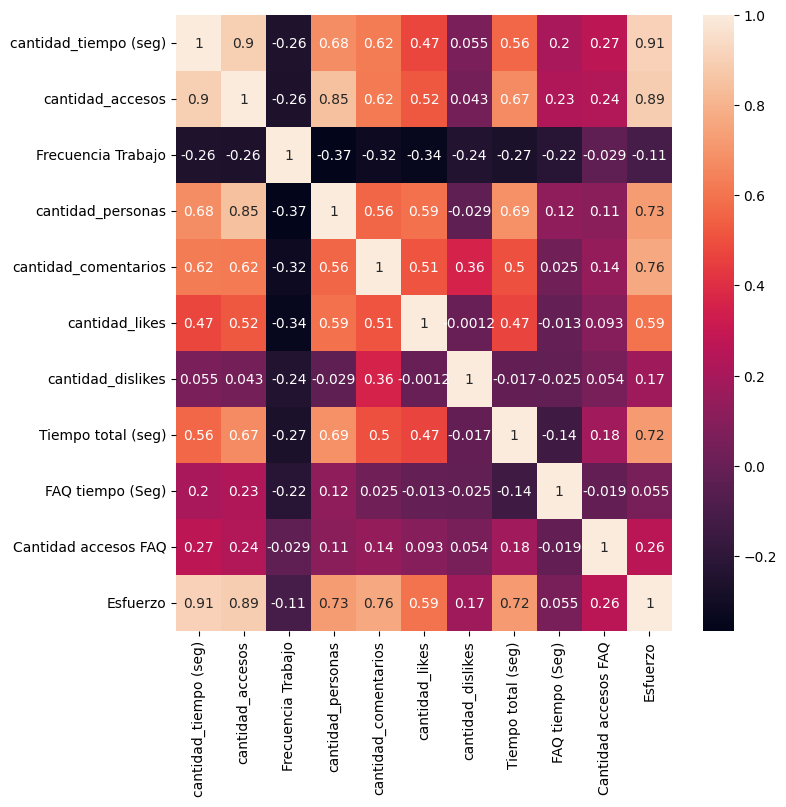

In [ ]:
corr_matrix = df_raw.corr(method = "pearson", numeric_only = True)
plt.figure(figsize = (8,8))
sns.heatmap(corr_matrix, annot = True)
plt.savefig("corrmatrixmipmo.png", dpi = 300, bbox_inches = "tight")
plt.show()

##**11. The end**
I hope this code has been usefull for your Decision - Making problem.

For more insight to the theoric part of the method, please refer to this article:

Zhu, Y., Tian, D., & Yan, F. (2020). Effectiveness of Entropy Weight Method in Decision-Making. Mathematical Problems in Engineering, 2020. https://doi.org/10.1155/2020/3564835